In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pred_df = pd.read_csv("prediction_result/grid_30_layers_3_policy_0.csv", index_col="OD_id")

In [3]:
pred_df

,start_vertex,end_vertex,distance,lam_w,P_w,l_w,e_w
OD_id,,,,,,,
0,407,605,9500,0.024269,0.483179,9624.529221,2554.974657
1,768,713,3500,0.005294,0.329745,3551.477023,798.547550
2,808,92,24500,0.021593,0.627599,24770.640556,8016.965097
3,364,694,5500,0.017611,0.481836,5747.754232,1873.850685
4,220,562,11500,0.023442,0.539180,11724.215554,3865.681200
...,...,...,...,...,...,...,...
295,338,524,6000,0.021124,0.548190,6190.080979,2495.649739
296,494,840,13000,0.020942,0.538859,13085.324685,3516.301249
297,500,788,11000,0.007322,0.489094,11173.399186,2170.834289


In [4]:
pred_ride_dist = np.sum(pred_df['lam_w'] * (pred_df["l_w"] - pred_df['e_w'] / 2))

In [5]:
simu_df = pd.read_csv("simulation_result/grid_30_layers_3_policy_0.csv")

In [6]:
simu_df

,start_vertex,end_vertex,original_distance,num,matching_num,matching_probability,shared_distance,final_distance
0,407,605,9500,709,345,0.49,2484.49,9629.76
1,768,713,3500,178,74,0.42,1067.42,3573.03
2,808,92,24500,659,421,0.64,7896.05,24751.90
3,364,694,5500,531,280,0.53,2129.00,5765.54
4,220,562,11500,711,385,0.54,3916.32,11715.19
...,...,...,...,...,...,...,...,...
295,338,524,6000,640,368,0.57,2635.94,6220.31
296,494,840,13000,623,339,0.54,3363.56,13093.10
297,500,788,11000,216,100,0.46,2025.46,11171.30
298,416,439,4000,175,83,0.47,1577.14,4205.71


In [7]:
simu_ride_dist = np.sum((simu_df['final_distance'] - simu_df['shared_distance'] / 2) * simu_df['num']) / 30000

In [8]:
pred_ride_dist, simu_ride_dist

(40348.09820673321, 40490.174544833346)

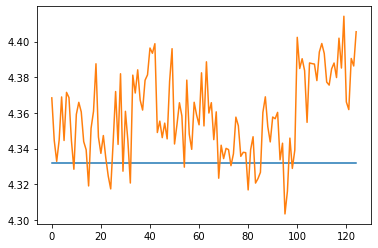

In [9]:
value = []
for i in range(125):
    pred_df = pd.read_csv("prediction_result/grid_30_layers_3_policy_{:.0f}.csv".format(i), index_col="OD_id")
    pred_ride_dist = np.sum(pred_df['lam_w'])
    simu_df = pd.read_csv("simulation_result/grid_30_layers_3_policy_{:.0f}.csv".format(i))
    simu_ride_dist = np.sum(simu_df['num']) / 30000
    value.append([pred_ride_dist, simu_ride_dist])
plt.plot(np.array(value))
plt.show()

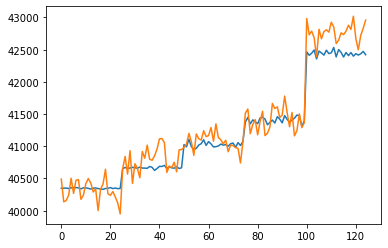

In [10]:
value = []
for i in range(125):
    pred_df = pd.read_csv("prediction_result/grid_30_layers_3_policy_{:.0f}.csv".format(i), index_col="OD_id")
    pred_ride_dist = np.sum(pred_df['lam_w'] * (pred_df["l_w"] - pred_df['e_w'] / 2))
    simu_df = pd.read_csv("simulation_result/grid_30_layers_3_policy_{:.0f}.csv".format(i))
    simu_ride_dist = np.sum((simu_df['final_distance'] - simu_df['shared_distance'] / 2) * simu_df['num']) / 30000
    value.append([pred_ride_dist, simu_ride_dist])
plt.plot(np.array(value))
plt.show()

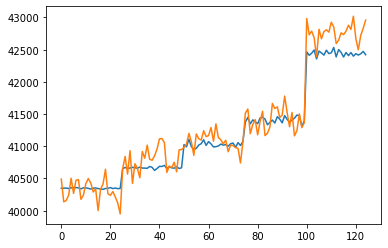

In [11]:
plt.plot(value)
plt.show()

In [12]:
value = np.array(value)
np.sqrt(np.sum((value[:,0]-value[:,1])**2) / 125)

220.7358996344169

In [13]:
pd.DataFrame(np.abs(value[:,0]-value[:,1])).describe()

,0
count,125.000000
mean,176.383311
std,133.249043
min,0.188263
25%,75.594260
50%,137.600372
75%,271.259501
max,619.669152


In [14]:
100 * (np.sum(np.abs(value[:,0]-value[:,1]) / value[:,1]) / 125)

0.4242124689562066

In [15]:
pd.DataFrame(np.abs(value[:,0]-value[:,1]) / value[:,1] * 100).describe()

,0
count,125.000000
mean,0.424212
std,0.314862
min,0.000463
25%,0.183027
50%,0.332482
75%,0.665812
max,1.440446
